# K-prototype
## test the generated data

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [256]:
# import the generated data
df_gen = pd.read_csv("./generated data from BBN new Z3.csv", encoding = 'latin-1', index_col='Unnamed: 0')
df_gen.head()

,order_distance,order_origin_weight,lead_days,week_id,rate_norm,est_cost_norm,rate_cat,cost_cat,color,CurrentCondition
Unnamed: 0,,,,,,,,,,
0,328.887342,37423.671484,5,3,0.745465,0.258851,<=2,<=2,RED,Accepted
1,432.511533,44112.233825,5,4,0.822597,0.833778,<=2,<=2,RED,Rejected
2,544.555273,38315.198374,7,3,1.182238,0.944255,<=2,<=2,RED,Rejected
3,138.258376,40953.390305,1,4,-0.397974,-0.482964,<=0,<=0,RED,Accepted
4,319.227262,41972.466041,1,4,-0.869040,0.306075,<=0,<=2,RED,Withdrawn


In [257]:
# a function to change the strings in color to integers
# color: green = 1, red = 2, yellow = 3

def color_to_num(a):
    if a == "GREEN":
        return 1
    elif a == "RED":
        return 2
    elif a == "YELLOW":
        return 3

In [258]:
df_gen['color_num']=df_gen.apply(lambda column: color_to_num(column['color']),axis=1)

df_gen.head()

,order_distance,order_origin_weight,lead_days,week_id,rate_norm,est_cost_norm,rate_cat,cost_cat,color,CurrentCondition,color_num
Unnamed: 0,,,,,,,,,,,
0,328.887342,37423.671484,5,3,0.745465,0.258851,<=2,<=2,RED,Accepted,2
1,432.511533,44112.233825,5,4,0.822597,0.833778,<=2,<=2,RED,Rejected,2
2,544.555273,38315.198374,7,3,1.182238,0.944255,<=2,<=2,RED,Rejected,2
3,138.258376,40953.390305,1,4,-0.397974,-0.482964,<=0,<=0,RED,Accepted,2
4,319.227262,41972.466041,1,4,-0.869040,0.306075,<=0,<=2,RED,Withdrawn,2


In [259]:
# a function to change the strings in CurrentCondition to integers
# CurrentCondition: Accepted = 1, Cancelled = 2, NoPace = 3, Rejected = 4, Waiting On Acceptance = 5, 
# Waiting On Recommendation = 6, Withdrawn =7 

def cc_to_num(a):
    if a == "Accepted":
        return 1
    elif a == "Cancelled":
        return 2
    elif a == "NoPace":
        return 3
    elif a == "Rejected":
        return 4
    elif a == "Waiting On Acceptance":
        return 5
    elif a == "Waiting On Recommendation":
        return 6
    elif a == "Withdrawn":
        return 7

In [260]:
df_gen['CurrentCondition_num']=df_gen.apply(lambda column: cc_to_num(column['CurrentCondition']),axis=1)

df_gen.head()

,order_distance,order_origin_weight,lead_days,week_id,rate_norm,est_cost_norm,rate_cat,cost_cat,color,CurrentCondition,color_num,CurrentCondition_num
Unnamed: 0,,,,,,,,,,,,
0,328.887342,37423.671484,5,3,0.745465,0.258851,<=2,<=2,RED,Accepted,2,1
1,432.511533,44112.233825,5,4,0.822597,0.833778,<=2,<=2,RED,Rejected,2,4
2,544.555273,38315.198374,7,3,1.182238,0.944255,<=2,<=2,RED,Rejected,2,4
3,138.258376,40953.390305,1,4,-0.397974,-0.482964,<=0,<=0,RED,Accepted,2,1
4,319.227262,41972.466041,1,4,-0.869040,0.306075,<=0,<=2,RED,Withdrawn,2,7


In [261]:
# normalize distance and weight by z-score
from scipy import stats

df_gen['order_distance_norm'] = stats.zscore(df_gen['order_distance'])
df_gen['order_origin_weight_norm'] = stats.zscore(df_gen['order_origin_weight'])
df_gen.head()

,order_distance,order_origin_weight,lead_days,week_id,rate_norm,est_cost_norm,rate_cat,cost_cat,color,CurrentCondition,color_num,CurrentCondition_num,order_distance_norm,order_origin_weight_norm
Unnamed: 0,,,,,,,,,,,,,,
0,328.887342,37423.671484,5,3,0.745465,0.258851,<=2,<=2,RED,Accepted,2,1,0.381818,-0.100934
1,432.511533,44112.233825,5,4,0.822597,0.833778,<=2,<=2,RED,Rejected,2,4,0.927798,-0.047581
2,544.555273,38315.198374,7,3,1.182238,0.944255,<=2,<=2,RED,Rejected,2,4,1.518139,-0.093822
3,138.258376,40953.390305,1,4,-0.397974,-0.482964,<=0,<=0,RED,Accepted,2,1,-0.622578,-0.072778
4,319.227262,41972.466041,1,4,-0.869040,0.306075,<=0,<=2,RED,Withdrawn,2,7,0.330920,-0.064649


In [262]:
print(df_gen['est_cost_norm'].max())
print(df_gen['est_cost_norm'].min())

3.972939622427313
-3.997033680026476


In [263]:
print(df_gen['order_distance_norm'].max())
print(df_gen['order_distance_norm'].min())

4.657827318780181
-1.39163139876917


In [264]:
print(df_gen['order_origin_weight_norm'].max())
print(df_gen['order_origin_weight_norm'].min())

77.41494934293256
-0.39855536289800275


In [265]:
sum(df_gen['order_origin_weight_norm']>6)

24

Since there are outliers in order_origin_weight_norm and only 24 out of 13000, I exclude the outliers for the future analysis as the values matter a lot in clustering algorithms.

In [266]:
# exclude the rows with outliers in order_origin_weight_norm
print(df_gen.shape)
df_gen = df_gen[df_gen['order_origin_weight_norm']<6]
print(df_gen.shape)

(12959, 14)
(12935, 14)


# K-Prototypes 
## with normalize continuous variables (z-score to match the normalization of rate and cost)

In [267]:
# remove columns rate_cat, cost_cat, color, CurrentCondition and make a new dataframe

drop_list = ['order_distance_norm','order_origin_weight_norm','week_id','lead_days','rate_norm','est_cost_norm',
             'color_num','CurrentCondition_num']
df_gen_num = df_gen.copy()
df_gen_num = df_gen_num.drop(df_gen_num.columns.difference(drop_list), axis=1)
print(df_gen_num.shape)
df_gen_num.head()

(12935, 8)


,lead_days,week_id,rate_norm,est_cost_norm,color_num,CurrentCondition_num,order_distance_norm,order_origin_weight_norm
Unnamed: 0,,,,,,,,
0,5,3,0.745465,0.258851,2,1,0.381818,-0.100934
1,5,4,0.822597,0.833778,2,4,0.927798,-0.047581
2,7,3,1.182238,0.944255,2,4,1.518139,-0.093822
3,1,4,-0.397974,-0.482964,2,1,-0.622578,-0.072778
4,1,4,-0.869040,0.306075,2,7,0.330920,-0.064649


In [268]:
def plot_cluster(X, y, title="Cluster plot"):
    fig = X.plot.scatter(x='X1', y='X2', color=y)
    fig.update_layout(autosize=False, width=475, height=475,
                  coloraxis = dict(showscale=False, colorscale='Portland'),
                  font=dict(size=18),
                  title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=15))
    return fig

In [269]:
# import original data
# which was exported from BBN
df_ori_all = pd.read_csv("./original data for BBN.csv", encoding = 'latin-1', index_col = 'Unnamed: 0')

In [270]:
# use the data which has the same size as df_gen
df_ori = df_ori_all.copy()
df_ori = df_ori.head(df_gen_num.shape[0])
print(df_ori.shape)

(12935, 19)


In [271]:
# normalize weight and distance, then cut off columns in df_ori
df_ori.head()

,request_id,week_id,weekday,miles,order_equipment_type,order_distance,order_num_stops,order_origin_weight,lead_days,color,origin_dat_ref,dest_dat_ref,rate_norm,est_cost_norm,CurrentCondition,ZipZone_origin,ZipZone_dest,rate_cat,cost_cat
Unnamed: 0,,,,,,,,,,,,,,,,,,,
8,8f67eb6f89ff40bcb4289f1f62227df6,1,Wed,154,V,141.0,2,45679.0,6,YELLOW,326,347,-0.154330,-1.282368,Accepted,Z3,Z3,<=0,<=0
14,da4ec185b5644deea572fa379b9feed4,2,Wed,214,V,221.0,2,25677.0,7,GREEN,350,325,-0.099179,-0.129520,Accepted,Z3,Z3,<=0,<=0
17,f8a5bbfacc1b4e188fa7616da6c4207f,1,Wed,216,V,220.0,2,40349.0,8,RED,338,331,-0.869951,-0.933859,Rejected,Z3,Z3,<=0,<=0
21,9aac0768ac584c6d9459cf23dab7369a,1,Mon,57,V,60.0,2,39847.0,3,RED,328,338,-0.684707,-0.931124,Withdrawn,Z3,Z3,<=0,<=0
62,3278d00061f644a19c2c564da3888bcc,4,Wed,283,V,262.0,2,39478.0,2,RED,301,388,-1.285638,-1.147469,Rejected,Z3,Z3,<=0,<=0


In [272]:
# normalize the weight and distance in the original data for K-prototype
df_ori['order_distance_norm'] = stats.zscore(df_ori['order_distance'])
df_ori['order_origin_weight_norm'] = stats.zscore(df_ori['order_origin_weight'])

print(df_gen['est_cost_norm'].max())
print(df_gen['est_cost_norm'].min())

print(df_gen['order_origin_weight_norm'].max())
print(df_gen['order_origin_weight_norm'].min())


3.972939622427313
-3.997033680026476
5.719744800477353
-0.39855536289800275


In [273]:
df_ori.head()

,request_id,week_id,weekday,miles,order_equipment_type,order_distance,order_num_stops,order_origin_weight,lead_days,color,...,dest_dat_ref,rate_norm,est_cost_norm,CurrentCondition,ZipZone_origin,ZipZone_dest,rate_cat,cost_cat,order_distance_norm,order_origin_weight_norm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
8,8f67eb6f89ff40bcb4289f1f62227df6,1,Wed,154,V,141.0,2,45679.0,6,YELLOW,...,347,-0.154330,-1.282368,Accepted,Z3,Z3,<=0,<=0,-0.615036,0.490808
14,da4ec185b5644deea572fa379b9feed4,2,Wed,214,V,221.0,2,25677.0,7,GREEN,...,325,-0.099179,-0.129520,Accepted,Z3,Z3,<=0,<=0,-0.191581,-0.616314
17,f8a5bbfacc1b4e188fa7616da6c4207f,1,Wed,216,V,220.0,2,40349.0,8,RED,...,331,-0.869951,-0.933859,Rejected,Z3,Z3,<=0,<=0,-0.196875,0.195789
21,9aac0768ac584c6d9459cf23dab7369a,1,Mon,57,V,60.0,2,39847.0,3,RED,...,338,-0.684707,-0.931124,Withdrawn,Z3,Z3,<=0,<=0,-1.043785,0.168003
62,3278d00061f644a19c2c564da3888bcc,4,Wed,283,V,262.0,2,39478.0,2,RED,...,388,-1.285638,-1.147469,Rejected,Z3,Z3,<=0,<=0,0.025439,0.147579


In [274]:
df_ori['color_num']=df_ori.apply(lambda column: color_to_num(column['color']),axis=1)

df_ori['CurrentCondition_num']=df_ori.apply(lambda column: cc_to_num(column['CurrentCondition']),axis=1)

In [275]:
drop_list = ['order_distance_norm','order_origin_weight_norm','week_id', 'lead_days','rate_norm','est_cost_norm',
             'color_num','CurrentCondition_num']
df_ori_num = df_ori.copy()
df_ori_num = df_ori_num.drop(df_ori_num.columns.difference(drop_list), axis=1)
print(df_ori_num.shape)
df_ori_num.head()

(12935, 8)


,week_id,lead_days,rate_norm,est_cost_norm,order_distance_norm,order_origin_weight_norm,color_num,CurrentCondition_num
Unnamed: 0,,,,,,,,
8,1,6,-0.154330,-1.282368,-0.615036,0.490808,3,1
14,2,7,-0.099179,-0.129520,-0.191581,-0.616314,1,1
17,1,8,-0.869951,-0.933859,-0.196875,0.195789,2,4
21,1,3,-0.684707,-0.931124,-1.043785,0.168003,2,7
62,4,2,-1.285638,-1.147469,0.025439,0.147579,2,4


In [276]:
df_gen_num.head()

,lead_days,week_id,rate_norm,est_cost_norm,color_num,CurrentCondition_num,order_distance_norm,order_origin_weight_norm
Unnamed: 0,,,,,,,,
0,5,3,0.745465,0.258851,2,1,0.381818,-0.100934
1,5,4,0.822597,0.833778,2,4,0.927798,-0.047581
2,7,3,1.182238,0.944255,2,4,1.518139,-0.093822
3,1,4,-0.397974,-0.482964,2,1,-0.622578,-0.072778
4,1,4,-0.869040,0.306075,2,7,0.330920,-0.064649


In [277]:
# add true labels to data
# original = 0, generated = 1
df_ori_num['true_id'] = np.zeros(df_ori_num.shape[0], dtype=int)
df_ori_num.head()

,week_id,lead_days,rate_norm,est_cost_norm,order_distance_norm,order_origin_weight_norm,color_num,CurrentCondition_num,true_id
Unnamed: 0,,,,,,,,,
8,1,6,-0.154330,-1.282368,-0.615036,0.490808,3,1,0
14,2,7,-0.099179,-0.129520,-0.191581,-0.616314,1,1,0
17,1,8,-0.869951,-0.933859,-0.196875,0.195789,2,4,0
21,1,3,-0.684707,-0.931124,-1.043785,0.168003,2,7,0
62,4,2,-1.285638,-1.147469,0.025439,0.147579,2,4,0


In [278]:
df_gen_num['true_id'] = np.ones(df_gen_num.shape[0], dtype=int)
df_gen_num.head()

,lead_days,week_id,rate_norm,est_cost_norm,color_num,CurrentCondition_num,order_distance_norm,order_origin_weight_norm,true_id
Unnamed: 0,,,,,,,,,
0,5,3,0.745465,0.258851,2,1,0.381818,-0.100934,1
1,5,4,0.822597,0.833778,2,4,0.927798,-0.047581,1
2,7,3,1.182238,0.944255,2,4,1.518139,-0.093822,1
3,1,4,-0.397974,-0.482964,2,1,-0.622578,-0.072778,1
4,1,4,-0.869040,0.306075,2,7,0.330920,-0.064649,1


In [279]:
# combine the generated data df_gen_num with the original data df_ori_num
from IPython.display import display, HTML
 
df_com = pd.concat([df_gen_num, df_ori_num], ignore_index = True)
df_com.reset_index()
  
display(df_com)
#print(df_com.shape)

,lead_days,week_id,rate_norm,est_cost_norm,color_num,CurrentCondition_num,order_distance_norm,order_origin_weight_norm,true_id
0,5,3,0.745465,0.258851,2,1,0.381818,-0.100934,1
1,5,4,0.822597,0.833778,2,4,0.927798,-0.047581,1
2,7,3,1.182238,0.944255,2,4,1.518139,-0.093822,1
3,1,4,-0.397974,-0.482964,2,1,-0.622578,-0.072778,1
4,1,4,-0.869040,0.306075,2,7,0.330920,-0.064649,1
...,...,...,...,...,...,...,...,...,...
25865,3,1,0.121318,0.601906,2,1,1.904521,0.453225,0
25866,3,1,-0.642452,-0.628049,2,1,0.761192,-1.041240,0
25867,6,3,-1.295451,-0.472723,2,1,-0.170409,-0.602863,0
25868,4,2,-0.520355,-0.357985,2,1,1.248165,0.370199,0


In [281]:
# get a copy of df_com without true_id to put into k-prototype
df_com_noid = df_com.copy()
df_com_noid = df_com_noid.drop(columns = 'true_id',axis=1)
df_com_noid.head()

,lead_days,week_id,rate_norm,est_cost_norm,color_num,CurrentCondition_num,order_distance_norm,order_origin_weight_norm
0,5,3,0.745465,0.258851,2,1,0.381818,-0.100934
1,5,4,0.822597,0.833778,2,4,0.927798,-0.047581
2,7,3,1.182238,0.944255,2,4,1.518139,-0.093822
3,1,4,-0.397974,-0.482964,2,1,-0.622578,-0.072778
4,1,4,-0.869040,0.306075,2,7,0.330920,-0.064649


df_com_noid is the data put into k-prototype.

# k-prototype

In [282]:
# Import module for data visualization
from plotnine import *
import plotnine

# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [283]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [284]:
dfMatrix = df_com_noid.to_numpy()

In [285]:
df_com_noid.head()

,lead_days,week_id,rate_norm,est_cost_norm,color_num,CurrentCondition_num,order_distance_norm,order_origin_weight_norm
0,5,3,0.745465,0.258851,2,1,0.381818,-0.100934
1,5,4,0.822597,0.833778,2,4,0.927798,-0.047581
2,7,3,1.182238,0.944255,2,4,1.518139,-0.093822
3,1,4,-0.397974,-0.482964,2,1,-0.622578,-0.072778
4,1,4,-0.869040,0.306075,2,7,0.330920,-0.064649


In [ ]:
# positions oof categorical columns: [0,1,4,5]

In [304]:
# Another way to get the position of categorical columns
#catColumnsPos = [df_com_noid.columns.get_loc(col) for col in list(df_com_noid.select_dtypes('integer').columns)]
#print('Categorical columns           : {}'.format(list(df_gen_noid.select_dtypes('integer').columns)))
#print('Categorical columns position  : {}'.format(catColumnsPos))

In [288]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [0,1,4,5])

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [289]:
# Cluster centorid
kprototype.cluster_centroids_

array([[ 0.64593282,  0.78116732,  1.19190882, -0.03533599,  5.        ,
         3.        ,  2.        ,  1.        ],
       [-0.55220694, -0.59511294, -0.45639788, -0.00698425,  1.        ,
         2.        ,  2.        ,  1.        ]])

In [290]:
# Check the iteration of the clusters created
kprototype.n_iter_

17

In [291]:
# Add the cluster to the dataframe with true_id
df_com['cluster_id'] = kprototype.labels_

In [292]:
df_com.head()

,lead_days,week_id,rate_norm,est_cost_norm,color_num,CurrentCondition_num,order_distance_norm,order_origin_weight_norm,true_id,cluster_id
0,5,3,0.745465,0.258851,2,1,0.381818,-0.100934,1,0
1,5,4,0.822597,0.833778,2,4,0.927798,-0.047581,1,0
2,7,3,1.182238,0.944255,2,4,1.518139,-0.093822,1,0
3,1,4,-0.397974,-0.482964,2,1,-0.622578,-0.072778,1,1
4,1,4,-0.869040,0.306075,2,7,0.330920,-0.064649,1,1


In [293]:
# show unique values in a column
column_values = df_com[["cluster_id"]].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

[0 1]


In [294]:
# ratio of matched pairs in true_id and cluster_id
comparison_results = np.where(df_com["true_id"] == df_com["cluster_id"], True, False)
true_count = sum(comparison_results)
print(true_count)
print(true_count/len(comparison_results))

10968
0.42396598376497874


In [295]:
# test the other possibility of true_id
# original = 1, generated = 0
def inverse_id(a):
    if a == 1:
        return 0
    elif a == 0:
        return 1


In [296]:
df_com['true_id_inv'] = df_com.apply(lambda column: inverse_id(column['true_id']),axis=1)


In [297]:
df_com.head()

,lead_days,week_id,rate_norm,est_cost_norm,color_num,CurrentCondition_num,order_distance_norm,order_origin_weight_norm,true_id,cluster_id,true_id_inv
0,5,3,0.745465,0.258851,2,1,0.381818,-0.100934,1,0,0
1,5,4,0.822597,0.833778,2,4,0.927798,-0.047581,1,0,0
2,7,3,1.182238,0.944255,2,4,1.518139,-0.093822,1,0,0
3,1,4,-0.397974,-0.482964,2,1,-0.622578,-0.072778,1,1,0
4,1,4,-0.869040,0.306075,2,7,0.330920,-0.064649,1,1,0


In [298]:
# ratio after inversing true id
comparison_results_inv = np.where(df_com["true_id_inv"] == df_com["cluster_id"], True, False)
true_inv_count = sum(comparison_results_inv)
print(true_inv_count)
print(true_inv_count/len(comparison_results_inv))

14902
0.5760340162350213


In [299]:
# Plot the results 

# shaffle df_com and use rate_norm and cost_norm in the first 1200 rows 
# to plot the distributions of original and generated data
df_c = df_com.copy()
df_c = df_c.sample(frac = 1)


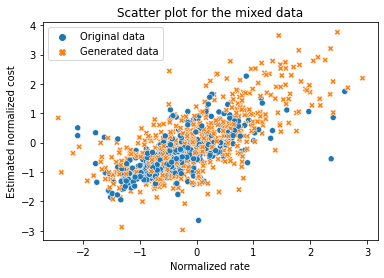

In [303]:
import seaborn as sns
pp = sns.scatterplot('rate_norm', 'est_cost_norm', hue = 'true_id', style = 'true_id', data = df_c[:1200], ci=None) #, palette=["green", "yellow", "red"]
#pp.set(xlim=(-4, 3))
#pp.set(ylim=(-3, 3))
#pp.legend(bbox_to_anchor=(1, 1.05))
plt.title("Scatter plot for the mixed data")
plt.ylabel("Estimated normalized cost")
plt.xlabel("Normalized rate")
handles, labels  =  pp.get_legend_handles_labels()

pp.legend(handles, ['Original data', 'Generated data'])